GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 48/48 [00:11<00:00,  4.20it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.306778..2.64].


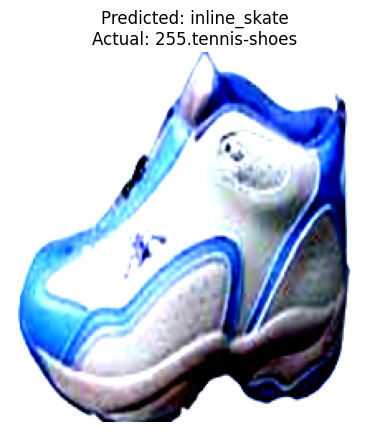

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6400006].


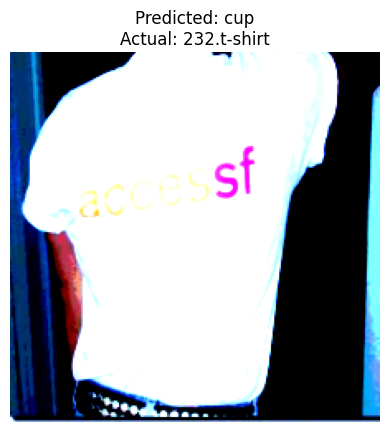

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.172618].


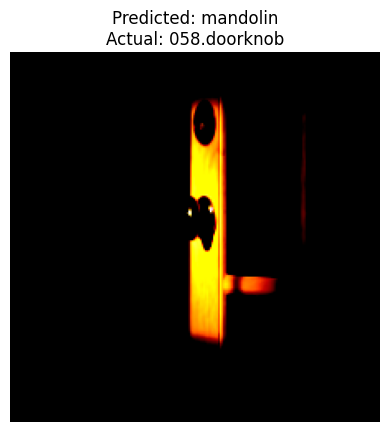

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9654907..2.636792].


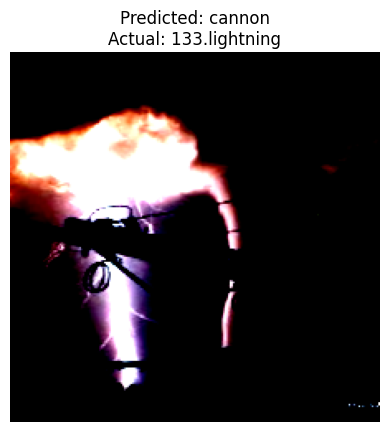

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.251182].


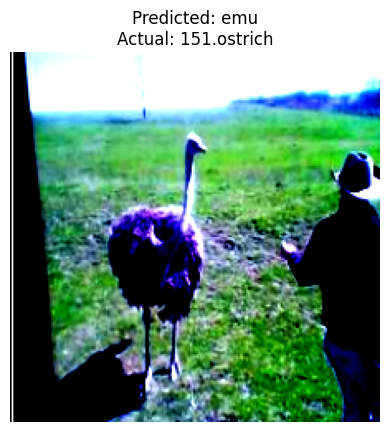

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0512118..2.6005137].


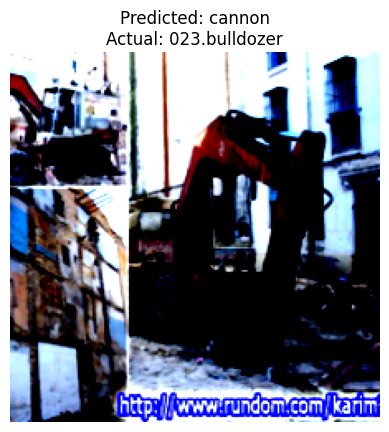

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.028328..2.3813715].


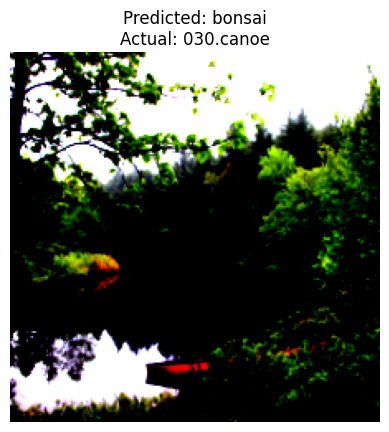

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2429774].


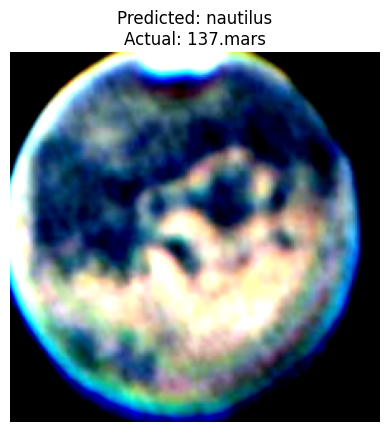

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2184918..2.2627735].


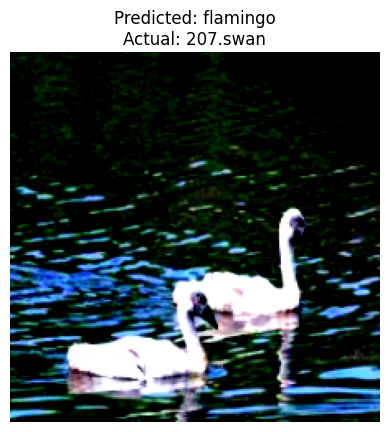

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8791605..2.64].


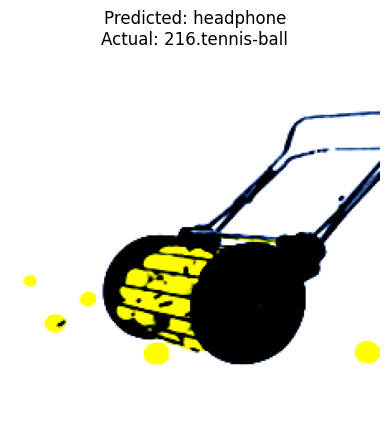

In [9]:
from models import ResNetModel
from datasets import Caltech101DataModule, Caltech256DataModule
from lightning import Trainer
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import Caltech256, Caltech101


caltech101_model = ResNetModel.load_from_checkpoint(
    "checkpoints/resnet50-caltech101-min-val-loss.ckpt"
)
caltech101_model.eval()
caltech256 = Caltech256DataModule()
trainer = Trainer(logger=False, enable_checkpointing=False)

caltech256.prepare_data()
caltech256.setup(stage="predict")
(imgs, targets) = next(iter(caltech256.predict_dataloader()))
labels_caltech256 = Caltech256(root="datasets/caltech256/", download=True).categories
labels_caltech101 = Caltech101(root="datasets/caltech101/", download=True).categories

# Predict with foreign model
with torch.no_grad():
    preds = trainer.predict(
        caltech101_model, dataloaders=caltech256.predict_dataloader()
    )
preds = torch.cat(preds).argmax(dim=1)
preds = preds[:10]

# Show the images
for i in range(len(preds)):
    plt.imshow(imgs[i].permute(1, 2, 0))
    plt.title(
        f"Predicted: {labels_caltech101[preds[i]]}\n"
        f"Actual: {labels_caltech256[targets[i]]}"
    )
    plt.axis("off")
    plt.show()